<a href="https://colab.research.google.com/github/Manuelstv/metodos-computacionais-B/blob/main/Prova_metcomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pylab as pl
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set()

**Questão 2) Modelo sir**

In [ ]:
def fI(S,I,t, beta, gama):
  return beta*S*I-gama*I

In [ ]:
def fS(S,I,t, beta):
  return -1*beta*S*I

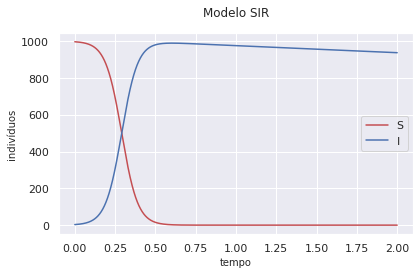

In [ ]:
N_passos = 10**4
dt = 2/N_passos

S_array = []; I_array =[]; t_array = [];

#individuos sucetiveis
S = 997
#individuos infectuosos
I = 3
#transmitibilidade
beta = 0.02
#taxa de recuperaçãão
gama = 0.04

for i in range(1, N_passos+1):
  t = i*dt
  S_array.append(S)
  I_array.append(I)
  t_array.append(t)

  k1_S = dt*fS(S,I,t,beta)
  k1_I = dt*fI(S,I,t,beta, gama)
  k2_S = dt*fS(S+0.5*k1_S,I+0.5*k1_S,t+0.5*dt,beta)
  k2_I = dt*fI(S+0.5*k1_I,I+0.5*k1_I,t+0.5*dt,beta,gama)

  S = S+k2_S
  I = I+k2_I

fig,ax = plt.subplots(figsize=(6,4))
ax.plot(t_array,S_array, color = 'r', label = "S")
ax.plot(t_array,I_array, color = 'b', label ='I')
ax.set_title("Modelo SIR", fontsize =12, y=1.05)
ax.set_xlabel("tempo", fontsize = 10)
ax.set_ylabel("indivíduos", fontsize = 10)
fig.tight_layout()
ax.legend()
fig.show()
fig.savefig("SIR")

**Questão 3: Decaimento radioativo**


In [ ]:
def g(N,lam):
  return(-1*lam*N)

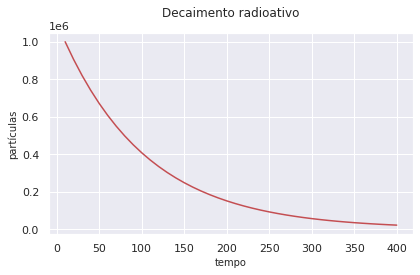

In [ ]:
#variavel lambda; tau = lam**-1
lam = 0.01
dt = lam**-1/10
#Tempo total
time = 4*(lam)**-1
#numero de particulas
N = 1000000
N_passos = round(time/dt)
N_array = []; t_array=[];

for i in range(1, N_passos+1):
  t = i*dt
  N_array.append(N)
  t_array.append(t)

  k1 = dt*g(N,lam)
  k2 = dt*g(N+0.5*k1,lam)

  N = N+k2

fig,ax = plt.subplots(figsize=(6,4))
ax.plot(t_array,N_array, color = 'r')
ax.set_title("Decaimento radioativo", fontsize =12, y=1.05)
ax.set_xlabel("tempo", fontsize = 10)
ax.set_ylabel("partículas", fontsize = 10)
fig.tight_layout()
fig.show()
fig.savefig("Decaimento")

**Questão 4) Problema planetario**


In [ ]:
#aceleração em x
def a_x(x,y):
  return -x/((x*x + y*y)**1.5)

In [ ]:
#aceleração em y
def a_y(x,y):
  return -y/((x*x + y*y)**1.5)

In [ ]:
#energia potencial
def U(x,y):
  return -1/((x*x + y*y)**0.5)

In [ ]:
#energia cinética
def K(vx,vy):
  v = (vx*vx + vy*vy)**0.5
  return 0.5*v**2

In [ ]:
#plotar a orbita, energia e velocidades
def graficos(K_array, U_array, x_array, vx_array, y_array, vy_array, t_array,nome):
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
  #primeiro gráfico
  ax1.plot(y_array,x_array, color = 'r', lw = 1)
  ax1.set_title("Órbita do planeta", fontsize =12)
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  #segundo gráfico
  ax2.plot(t_array, np.array(K_array)+np.array(U_array), color = 'r', lw = 1, label = "E total")
  ax2.plot(t_array, K_array, color = 'b', lw = 1, label = "E cinética")
  ax2.plot(t_array, U_array, color = 'g', lw = 1, label = "E potencial")
  ax2.legend()
  ax2.set_title("Energia do planeta", fontsize = 12)
  ax2.set_ylabel("Energia")
  ax2.set_xlabel("tempo")
  #terceiro gráfico
  ax3.plot(t_array, vx_array, color = 'r', lw = 1, label ="$v_x$")
  ax3.plot(t_array, vy_array, color = 'b', lw = 1, label ="$v_y$")
  ax3.legend()
  ax3.set_title("Velocidade do planeta", fontsize = 12)
  ax3.set_xlabel("tempo")
  ax3.set_ylabel("velocidade")
  fig.tight_layout()
  fig.show()
  fig.savefig(nome)

In [ ]:
#funcao para calcular erro medio
def erro_medio(E):
  tam = E_array.size
  erro = 0
  for k in range(1,tam):
    erro = erro+(E_array[0] - E_array[k])**2
  return erro**0.5/tam

In [ ]:
#regressão linear
def linear(X,y):
  regressor = LinearRegression()
  regressor.fit(X, y)
  y_pred = regressor.predict(X)

  print('Coeficiente: \n', regressor.coef_)
  print('intercepto: \n', regressor.intercept_)
  print('coeficiente de determinação: %.2f' % r2_score(y, y_pred))

  return X,y_pred

In [ ]:
#curva conectando os pontos
def interpolar(x,y):
  x = np.asarray(x).squeeze()
  y = np.asarray(y).squeeze()
  x_int = np.linspace(x.min(), x.max(),500)
  f = interp1d(x, y, kind='quadratic')
  y_int=f(x_int)
  return x_int,y_int

In [ ]:
#método de runge kutta 2 ordem
def rk_2(dt,x,vx,y,vy,N_passos):
  for i in range(1, N_passos+1):
    t = i*dt
    k1_x = dt*vx
    k1_vx = dt*a_x(x,y)
    k1_y = dt*vy
    k1_vy = dt*a_y(x,y)

    k2_x = dt*(vx+0.5*k1_vx)
    k2_vx = dt*a_x(x+0.5*k1_x, y+0.5*k1_x)
    k2_y = dt*(vy+0.5*k1_vy)
    k2_vy = dt*a_y(x+0.5*k1_y, y+0.5*k1_y)
  
    x_array.append(x)
    vx_array.append(vx)
    y_array.append(y)
    vy_array.append(vy)
    t_array.append(t)
    K_array.append(K(vx,vy))
    U_array.append(U(x,y))

    vy = vy+k2_vy
    vx = vx+k2_vx
    x = x+k2_x
    y = y+k2_y

  return K_array, U_array, x_array, vx_array, y_array, vy_array, t_array

In [ ]:
#método de verlet
def verlet(dt,x,vx,y,vy,N_passos):
  dt2 = dt*dt
  x_old = x
  x = x + vx*dt
  y_old = y
  y = y+vy*dt
  for i in range (1, N_passos+1):
    t = i*dt
    x_new = 2*x-x_old + a_x(x,y)*dt2
    vx = (x_new-x_old)/(2*dt)
    y_new = 2*y-y_old + a_y(x,y)*dt2
    vy = (y_new-y_old)/(2*dt)
    
    x_old = x
    x=x_new
    y_old = y
    y = y_new

    t_array.append(t)
    x_array.append(x_old)
    y_array.append(y_old) 
    K_array.append(K(vx,vy))
    U_array.append(U(x,y))
    vx_array.append(vx)
    vy_array.append(vy)

  return K_array, U_array, x_array, vx_array, y_array, vy_array,t_array

Coeficiente: 
 [[1.30878981]]
intercepto: 
 [-8.16091747]
coeficiente de determinação: 0.79


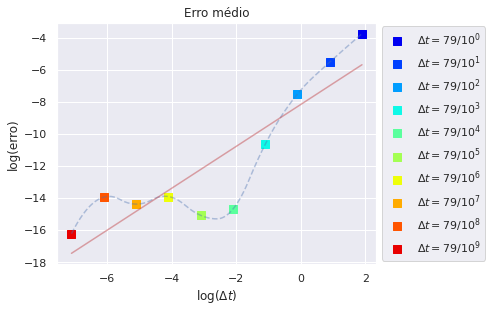

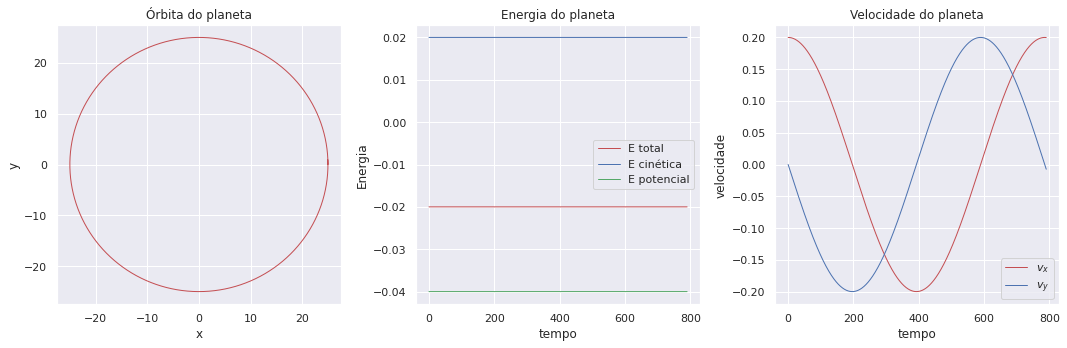

In [ ]:
#testando o método de verlet
fig, ax = plt.subplots(figsize=(7,4.5))
N_curvas = 10
colors = pl.cm.jet(np.linspace(0.1,1,N_curvas+1))
#colors = sns.color_palette("Paired", N_curvas)
erro_array = []; dt_array =[]

for j in range(1, N_curvas+1):
  dt = 790/(10**j)
  #verlet
  x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
  K_array, U_array, x_array, vx_array, y_array, vy_array, t_array = verlet(dt, x = 0, vx = 1/5, y = 25, vy = 0, N_passos = 1000)
  E_array = np.array(K_array)+np.array(U_array)
  erro_array.append(np.log10(erro_medio(E_array)))
  dt_array.append(np.log10(dt))
  #print("Erro para dt = " +f"0.5/2^{j}:", round(erro_medio(E_array),18))
  ax.scatter(np.log10(dt), np.log10(erro_medio(E_array)), label = f"$\Delta t =$" +f"$79/10^{j-1}$", color = colors[j-1], s=70, marker ='s')

#curva conectando os pontos
x_int,y_int = interpolar(dt_array, erro_array)
ax.plot(x_int,y_int, alpha = 0.4, linestyle = 'dashed', color = 'b')
#regressão linear
erro_array = np.array(erro_array).reshape(-1,1)
dt_array = np.array(dt_array).reshape(-1,1)
X,y_pred = linear(dt_array, erro_array)
ax.plot(X, y_pred, color = 'r', alpha = 0.5)

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Erro médio", fontsize = 12)
ax.set_ylabel("log(erro)")
ax.set_xlabel("log($\Delta t$)")
fig.tight_layout()
fig.show()
fig.savefig("erro_verlet")

#plotar a orbita, energia e velocidades
x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = verlet(dt = 790/10**6,x = 0,vx = 1/5,y = 25,vy = 0, N_passos = 10**6)
graficos(K_array, U_array, x_array, vx_array, y_array, vy_array,t_array, nome = 'verlet')

Coeficiente: 
 [[2.01173793]]
intercepto: 
 [-5.93615049]
coeficiente de determinação: 0.93


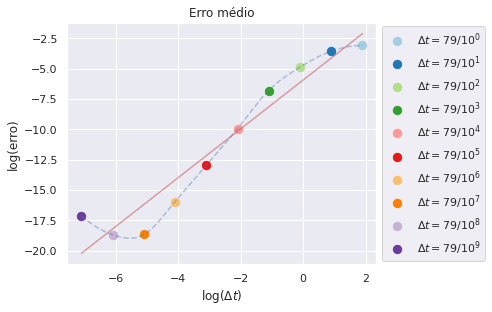

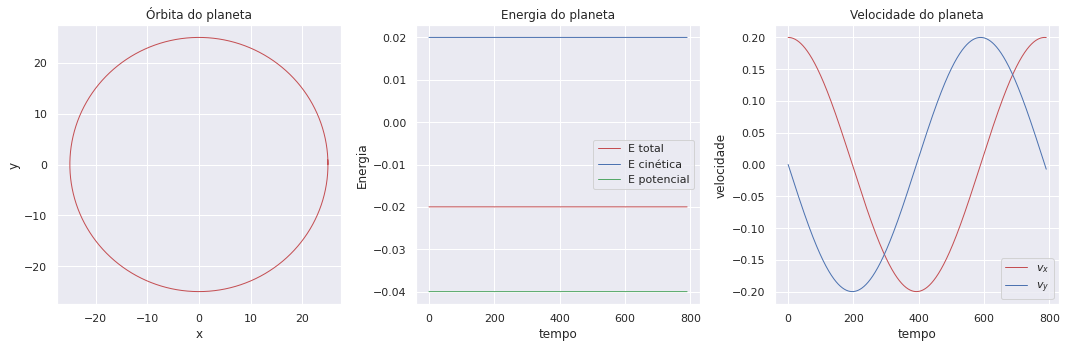

In [ ]:
#testando o método de rk
fig, ax = plt.subplots(figsize=(7,4.5))
N_curvas = 10
#colors = pl.cm.jet(np.linspace(0.1,1,N_curvas+1))
colors = sns.color_palette("Paired", N_curvas)
erro_array = []; dt_array =[]
for j in range(1, N_curvas+1):
  x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
  dt = 790/(10**j)
  K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = rk_2(dt,x = 0,vx = 0.2,y = 25,vy = 0, N_passos = 1000)
  E_array = np.array(K_array)+np.array(U_array)
  erro_array.append(np.log10(erro_medio(E_array)))
  dt_array.append(np.log10(dt))
  #print("Erro para dt = " +f"0.5/2^{j}:", round(erro_medio(E_array),18))
  ax.scatter(np.log10(dt), np.log10(erro_medio(E_array)), label = f"$\Delta t =$" +f"$79/10^{j-1}$", color = colors[j-1], s=70, marker ='o')

#curva conectando os pontos
x_int,y_int = interpolar(dt_array, erro_array)
ax.plot(x_int,y_int, alpha = 0.4, linestyle = 'dashed', color = 'b')
#regressão linear
erro_array = np.array(erro_array).reshape(-1,1)
dt_array = np.array(dt_array).reshape(-1,1)
X,y_pred = linear(dt_array, erro_array)
ax.plot(X, y_pred, color = 'r', alpha = 0.5)

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Erro médio", fontsize = 12)
ax.set_ylabel("log(erro)")
ax.set_xlabel("log($\Delta t$)")
fig.tight_layout()
fig.show()
fig.savefig("erro_rk2")

#plotar a orbita, energia e velocidades
x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = rk_2(dt = 790/10**6,x = 0,vx = 1/5,y = 25,vy = 0, N_passos = 10**6)
graficos(K_array, U_array, x_array, vx_array, y_array, vy_array,t_array, nome = 'rk_2')

In [ ]:
#@title órbita eliptica rk2
#testando o método de rk
fig, ax = plt.subplots(figsize=(7,4.5))
N_curvas = 10
#colors = pl.cm.jet(np.linspace(0.1,1,N_curvas+1))
colors = sns.color_palette("Paired", N_curvas)
erro_array = []; dt_array =[]
for j in range(1, N_curvas+1):
  x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
  dt = 790/(10**j)
  K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = rk_2(dt,x = 0,vx = 0.3,y = 9,vy = 0, N_passos = 2000)
  E_array = np.array(K_array)+np.array(U_array)
  erro_array.append(np.log10(erro_medio(E_array)))
  dt_array.append(np.log10(dt))
  #print("Erro para dt = " +f"0.5/2^{j}:", round(erro_medio(E_array),18))
  ax.scatter(np.log10(dt), np.log10(erro_medio(E_array)), label = f"$\Delta t =$" +f"$79/10^{j-1}$", color = colors[j-1], s=70, marker ='o')

#curva conectando os pontos
x_int,y_int = interpolar(dt_array, erro_array)
ax.plot(x_int,y_int, alpha = 0.4, linestyle = 'dashed', color = 'b')
#regressão linear
erro_array = np.array(erro_array).reshape(-1,1)
dt_array = np.array(dt_array).reshape(-1,1)
X,y_pred = linear(dt_array, erro_array)
ax.plot(X, y_pred, color = 'r', alpha = 0.5)

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Erro médio", fontsize = 12)
ax.set_ylabel("log(erro)")
ax.set_xlabel("log($\Delta t$)")
fig.tight_layout()
fig.show()
fig.savefig("erro_rk2_eli")

#plotar a orbita, energia e velocidades
x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = rk_2(dt = 0.1,x = 0,vx = 0.3,y = 9,vy = 0, N_passos = 2000)
graficos(K_array, U_array, x_array, vx_array, y_array, vy_array,t_array, nome = 'rk_2_eli')

In [ ]:
#@title orbita eliptica verlet
#testando o método de verlet
fig, ax = plt.subplots(figsize=(7,4.5))
N_curvas = 10
colors = pl.cm.jet(np.linspace(0.1,1,N_curvas+1))
#colors = sns.color_palette("Paired", N_curvas)
erro_array = []; dt_array =[]

for j in range(1, N_curvas+1):
  dt = 790/(10**j)
  #verlet
  x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
  K_array, U_array, x_array, vx_array, y_array, vy_array, t_array = verlet(dt,x = 0,vx = 0.3,y = 9,vy = 0, N_passos = 2000)
  E_array = np.array(K_array)+np.array(U_array)
  erro_array.append(np.log10(erro_medio(E_array)))
  dt_array.append(np.log10(dt))
  #print("Erro para dt = " +f"0.5/2^{j}:", round(erro_medio(E_array),18))
  ax.scatter(np.log10(dt), np.log10(erro_medio(E_array)), label = f"$\Delta t =$" +f"$79/10^{j-1}$", color = colors[j-1], s=70, marker ='s')

#curva conectando os pontos
x_int,y_int = interpolar(dt_array, erro_array)
ax.plot(x_int,y_int, alpha = 0.4, linestyle = 'dashed', color = 'b')
#regressão linear
erro_array = np.array(erro_array).reshape(-1,1)
dt_array = np.array(dt_array).reshape(-1,1)
X,y_pred = linear(dt_array, erro_array)
ax.plot(X, y_pred, color = 'r', alpha = 0.5)

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Erro médio", fontsize = 12)
ax.set_ylabel("log(erro)")
ax.set_xlabel("log($\Delta t$)")
fig.tight_layout()
fig.show()
fig.savefig("erro_verlet_eli")

#plotar a orbita, energia e velocidades
x_array = []; y_array =[]; t_array = []; K_array =[]; U_array = []; vx_array = []; vy_array = [];
K_array, U_array, x_array, vx_array, y_array, vy_array,t_array = verlet(dt = 0.1,x = 0,vx = 0.3,y = 9,vy = 0, N_passos = 2000)
graficos(K_array, U_array, x_array, vx_array, y_array, vy_array,t_array, nome = 'verlet_eli')